In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [6]:
# Read CSV File

df = pd.read_csv(r"C:\Users\daraa\OneDrive\Desktop\Data For proect\Unemployment in India.csv")

In [9]:
# All information about data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [15]:
# Rows and Columns

df.shape

(768, 7)

In [17]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [19]:
#check for null values

pd.isnull(df).sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [20]:
# drop null values

df.dropna(inplace=True)

In [21]:
#check again for null values

pd.isnull(df).sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [28]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

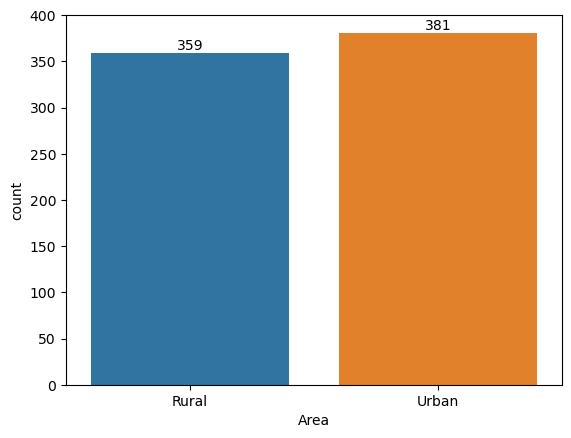

In [40]:
# plotting a bar chart for Area and it's count

ax = sns.countplot(x = 'Area' , data = df)

for bars in ax.containers:
    ax.bar_label(bars)

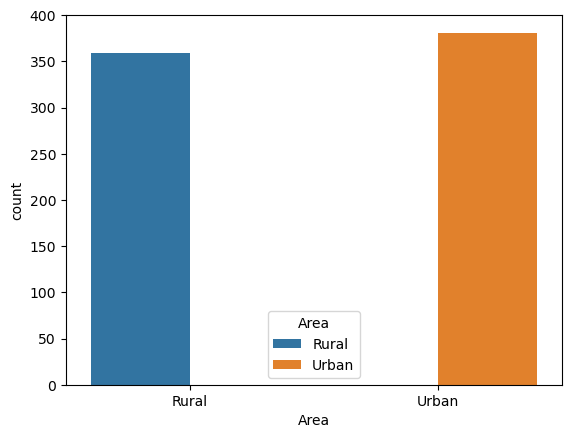

In [42]:
ax = sns.countplot(data = df , x = 'Area' , hue = 'Area')

In [50]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [59]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [69]:
# Strip Whitespace and Normalize
df.columns = df.columns.str.strip()

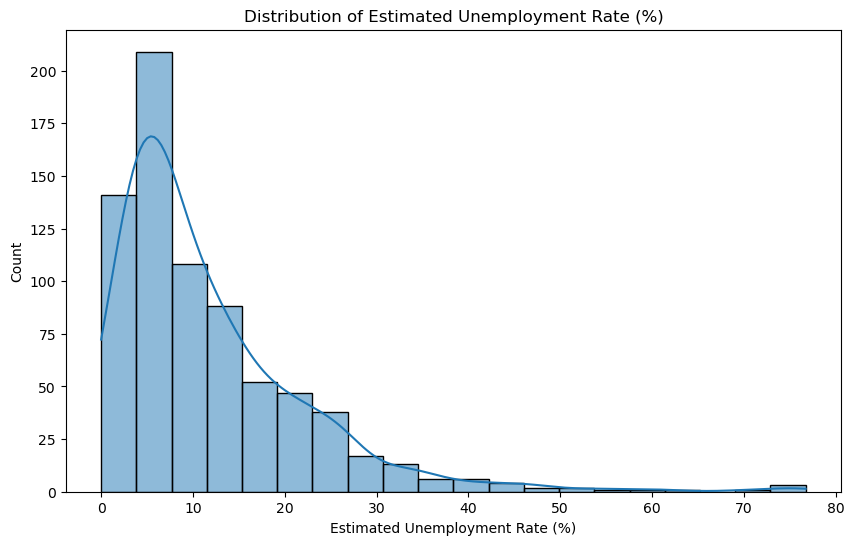

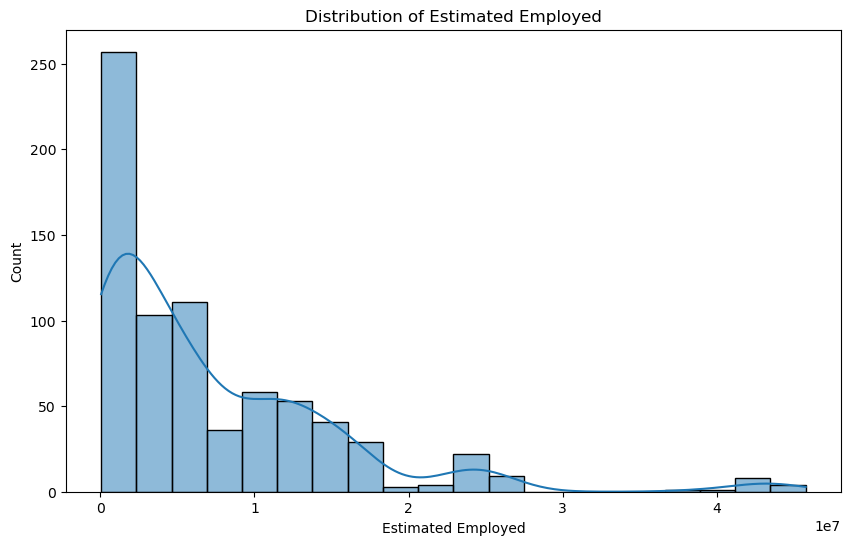

In [71]:
# Plot histograms for numerical columns

if 'Estimated Unemployment Rate (%)' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Estimated Unemployment Rate (%)'], bins=20, kde=True)
    plt.title('Distribution of Estimated Unemployment Rate (%)')
    plt.show()

if 'Estimated Employed' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Estimated Employed'], bins=20, kde=True)
    plt.title('Distribution of Estimated Employed')
    plt.show()


In [73]:
# Calculate the correlation matrix, specifying numeric_only=True
correlation_matrix = df.corr(numeric_only=True)

In [74]:
# Print the correlation matrix to verify
print(correlation_matrix)

                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  


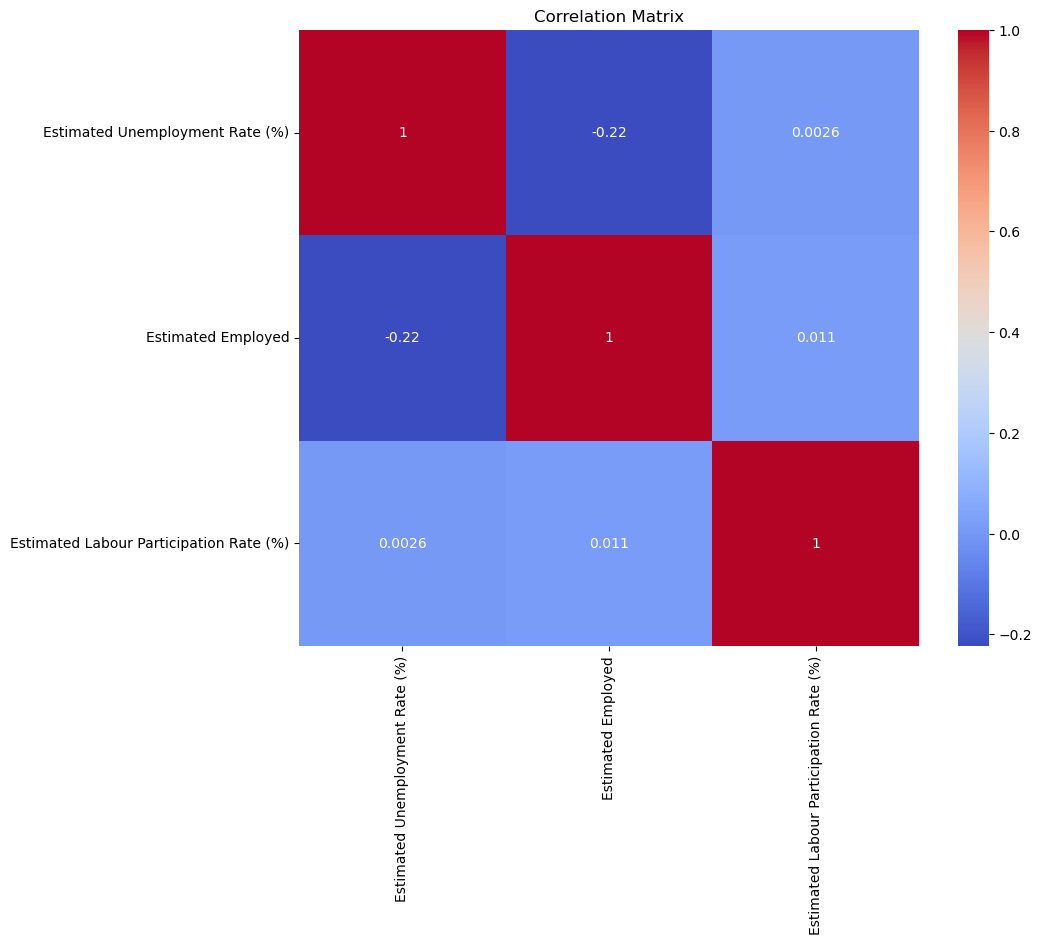

In [75]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [77]:
unemp_area = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print(unemp_area)


Area
Urban    13.166614
Rural    10.324791
Name: Estimated Unemployment Rate (%), dtype: float64


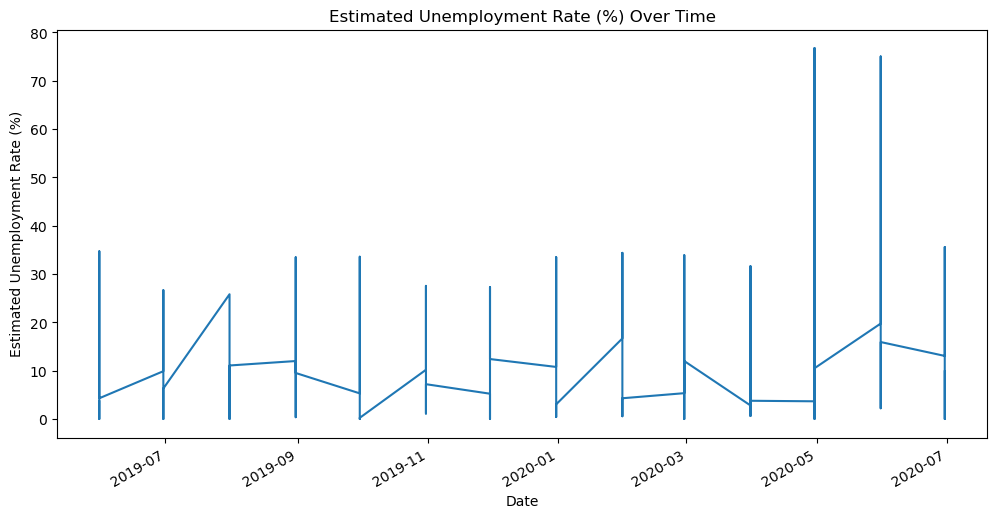

In [78]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the Date column is in datetime format
df.set_index('Date', inplace=True)

# Plot unemployment rate over time
plt.figure(figsize=(12, 6))
df['Estimated Unemployment Rate (%)'].plot()
plt.title('Estimated Unemployment Rate (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()


### Conclusion

There are significant differences in unemployment rates across different regions and areas in India, with certain regions consistently exhibiting higher or lower rates.
